In [2]:
from ib_insync import *
import pandas as pd
import numpy as np



In [3]:
from fbprophet import Prophet
import os

In [5]:
btc = pd.read_csv(os.path.normpath('C:/Users/rivin/Downloads/Bitfinex_BTCUSD_1h.csv'), parse_dates=['Date'])

In [6]:
btc.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2019-04-11 10-AM,BTCUSD,5095.8,5095.8,5094.0,5094.0,0.00,0.00
1,2019-04-11 09-AM,BTCUSD,5197.8,5198.0,5006.0,5095.8,1753.58,8928984.06
2,2019-04-11 08-AM,BTCUSD,5190.5,5199.0,5139.0,5197.8,1379.24,7113282.76
3,2019-04-11 07-AM,BTCUSD,5213.3,5213.4,5188.1,5190.5,288.79,1501479.16
4,2019-04-11 06-AM,BTCUSD,5209.5,5220.7,5199.9,5213.3,381.70,1988700.06


In [15]:
btc = btc.iloc[::-1]

In [16]:
btc.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
13177,2017-10-09 09-AM,BTCUSD,4575.4,4589.5,4568.6,4585.7,628.89,2878897.86
13176,2017-10-09 10-AM,BTCUSD,4585.7,4619.0,4582.0,4594.9,1333.44,6134684.09
13175,2017-10-09 11-AM,BTCUSD,4594.9,4618.0,4594.9,4603.0,738.14,3401164.60
13174,2017-10-09 12-PM,BTCUSD,4603.0,4610.0,4585.0,4595.5,570.88,2625211.20
13173,2017-10-09 01-PM,BTCUSD,4595.5,4621.0,4585.1,4617.2,1196.97,5515389.68


In [22]:
btc.tail(30)

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
29,2019-04-10 05-AM,BTCUSD,5257.86,5288.00,5257.86,5287.10,395.98,2088854.34
28,2019-04-10 06-AM,BTCUSD,5287.10,5296.00,5275.10,5293.90,344.88,1823151.98
27,2019-04-10 07-AM,BTCUSD,5293.90,5299.00,5267.00,5269.80,404.55,2137645.14
26,2019-04-10 08-AM,BTCUSD,5269.80,5286.10,5268.00,5286.06,134.57,710481.12
25,2019-04-10 09-AM,BTCUSD,5286.06,5295.20,5276.20,5282.10,260.07,1374518.86
24,2019-04-10 10-AM,BTCUSD,5282.10,5282.80,5271.30,5280.00,170.46,899555.22
23,2019-04-10 11-AM,BTCUSD,5280.00,5290.00,5280.00,5282.37,151.73,802216.88
22,2019-04-10 12-PM,BTCUSD,5282.37,5330.00,5277.50,5309.96,853.69,4529766.58
21,2019-04-10 01-PM,BTCUSD,5309.96,5320.00,5282.50,5299.70,697.39,3699975.55
20,2019-04-10 02-PM,BTCUSD,5299.70,5303.50,5289.80,5297.90,197.15,1044091.38


In [23]:
ri = pd.date_range(start='20171009090000', end='20190411100000', freq='1H')

In [20]:
ri

DatetimeIndex(['2017-10-09 09:00:00', '2017-10-09 10:00:00',
               '2017-10-09 11:00:00', '2017-10-09 12:00:00',
               '2017-10-09 13:00:00', '2017-10-09 14:00:00',
               '2017-10-09 15:00:00', '2017-10-09 16:00:00',
               '2017-10-09 17:00:00', '2017-10-09 18:00:00',
               ...
               '2019-04-09 15:00:00', '2019-04-09 16:00:00',
               '2019-04-09 17:00:00', '2019-04-09 18:00:00',
               '2019-04-09 19:00:00', '2019-04-09 20:00:00',
               '2019-04-09 21:00:00', '2019-04-09 22:00:00',
               '2019-04-09 23:00:00', '2019-04-10 00:00:00'],
              dtype='datetime64[ns]', length=13144, freq='H')

In [24]:
foo = btc.set_index(ri)

In [27]:
btc = foo.drop('Date', axis=1).reset_index()

,index,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2017-10-09 09:00:00,BTCUSD,4575.4,4589.5,4568.6,4585.7,628.89,2878897.86
1,2017-10-09 10:00:00,BTCUSD,4585.7,4619.0,4582.0,4594.9,1333.44,6134684.09
2,2017-10-09 11:00:00,BTCUSD,4594.9,4618.0,4594.9,4603.0,738.14,3401164.60
3,2017-10-09 12:00:00,BTCUSD,4603.0,4610.0,4585.0,4595.5,570.88,2625211.20
4,2017-10-09 13:00:00,BTCUSD,4595.5,4621.0,4585.1,4617.2,1196.97,5515389.68


In [29]:
prodf = btc[['index', 'Close']]

In [30]:
prodf.columns = ['ds', 'y']

In [31]:
prodf.y = np.log(prodf.y)

C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
#prodf.reset_index(inplace=True)

In [32]:
pp = Prophet(changepoint_prior_scale=0.001)

In [33]:
pp.fit(prodf)

C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [34]:
future = pp.make_future_dataframe(24, freq='1H')

In [35]:
forecast = pp.predict(future)

In [36]:
ff = forecast[['ds', 'yhat']]

In [93]:
both = pd.concat([prodf, ff], axis=1)

In [94]:
both['pdiff'] = both['yhat'] - both['y']
both['rdiff'] = -both.y.diff(-24)

In [39]:
import seaborn as sns
%matplotlib inline

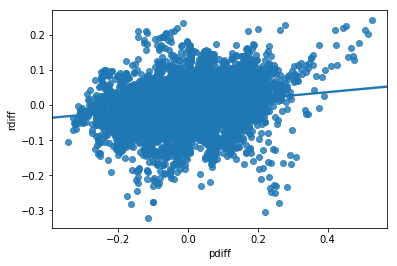

In [40]:
sns.regplot(x='pdiff', y='rdiff', data=both)

In [96]:
both.head()

,ds,y,ds,yhat,pdiff,rdiff
0,2017-10-09 09:00:00,8.430698,2017-10-09 09:00:00,8.424669,-0.006029,0.042898
1,2017-10-09 10:00:00,8.432702,2017-10-09 10:00:00,8.425201,-0.007501,0.047599
2,2017-10-09 11:00:00,8.434464,2017-10-09 11:00:00,8.426080,-0.008383,0.043136
3,2017-10-09 12:00:00,8.432833,2017-10-09 12:00:00,8.427125,-0.005708,0.054066
4,2017-10-09 13:00:00,8.437544,2017-10-09 13:00:00,8.428035,-0.009509,0.044395


In [97]:
both.columns = ['ds', 'y', 'ds2', 'yhat', 'pdiff', 'rdiff']

In [98]:
bigboth = both[both.pdiff>0.01]
littleboth = both[both.pdiff < -0.01]

In [101]:
littleboth.head()

,ds,y,ds2,yhat,pdiff,rdiff
5,2017-10-09 14:00:00,8.448272,2017-10-09 14:00:00,8.428668,-0.019604,0.027516
6,2017-10-09 15:00:00,8.443116,2017-10-09 15:00:00,8.429135,-0.013981,0.033693
7,2017-10-09 16:00:00,8.444601,2017-10-09 16:00:00,8.429649,-0.014952,0.049897
8,2017-10-09 17:00:00,8.458568,2017-10-09 17:00:00,8.430304,-0.028264,0.038423
9,2017-10-09 18:00:00,8.464847,2017-10-09 18:00:00,8.431019,-0.033827,0.028873


In [102]:
bigboth['ddd'] = bigboth.ds.dt.date
littleboth['ddd'] = littleboth.ds.dt.date

C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
bbb = bigboth.groupby('ddd').first()
lll = littleboth.groupby('ddd').first()

In [106]:
thetwo = pd.concat([bbb, lll], axis=1, join='outer')

C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [107]:
thetwo.fillna(value=0, inplace=True)

In [108]:
thetwo.head()

,ds,y,ds2,yhat,pdiff,rdiff,ds,y,ds2,yhat,pdiff,rdiff
2017-10-09,0,0.0,0,0.0,0.0,0.0,2017-10-09 14:00:00,8.448272,2017-10-09 14:00:00,8.428668,-0.019604,0.027516
2017-10-10,0,0.0,0,0.0,0.0,0.0,2017-10-10 00:00:00,8.493515,2017-10-10 00:00:00,8.435444,-0.058071,-0.026479
2017-10-11,0,0.0,0,0.0,0.0,0.0,2017-10-11 00:00:00,8.467036,2017-10-11 00:00:00,8.452177,-0.014859,0.018460
2017-10-12,0,0.0,0,0.0,0.0,0.0,2017-10-12 00:00:00,8.485496,2017-10-12 00:00:00,8.469705,-0.015791,0.105579
2017-10-13,0,0.0,0,0.0,0.0,0.0,2017-10-13 00:00:00,8.591075,2017-10-13 00:00:00,8.477474,-0.113602,0.038017


In [109]:
thetwo.columns=range(12)

In [110]:
thetwotwo = thetwo[[5, 11]]

In [111]:
thetwotwo.head()

,5,11
2017-10-09,0.0,0.027516
2017-10-10,0.0,-0.026479
2017-10-11,0.0,0.018460
2017-10-12,0.0,0.105579
2017-10-13,0.0,0.038017


In [112]:
thetwotwo[11]= - thetwotwo[11]

C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
thetwotwo.columns =['up', 'down']

In [115]:
thetwotwo['both']=thetwotwo.up + thetwotwo.down

C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
thetwotwo['ret'] = thetwotwo.both.cumsum()

C:\ProgramData\Anaconda3\envs\proph\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


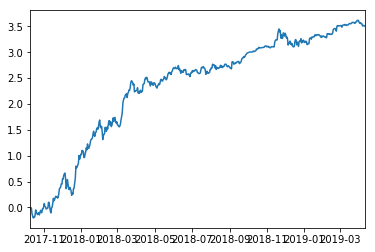

In [117]:
thetwotwo.ret.plot()

In [118]:
thetwotwo.describe()

,up,down,both,ret
count,544.000000,544.000000,544.000000,544.000000
mean,0.003167,0.003276,0.006443,2.322262
std,0.033616,0.034600,0.045753,1.082314
min,-0.163330,-0.194997,-0.194997,-0.202214
25%,0.000000,0.000000,-0.015147,1.627571
50%,0.000000,-0.000000,0.004210,2.661822
75%,0.009289,0.002799,0.027199,3.164604
max,0.131653,0.193751,0.230570,3.619172


In [119]:
def drawdown(s):
    return np.min(s-s.cummax())

In [120]:
drawdown(thetwotwo.both)

-0.3938998194487944

In [121]:
0.0064*19/0.046

2.643478260869565